In [55]:
from submodulos.tokenizer.custom_tokenizer import SpacyCustomTokenizer
import data.cubadebate as cb
from tools import get_progressbar
from datetime import datetime

texts = cb.get_details_text()
name = 'cubadebate'

In [59]:
def sorted_by_dict(d):
    result = [(key, d[key] )for key in d]
    result.sort(key= lambda x: x[1], reverse= True)
    return result

def print_best_word(list_):
    for i in range(20):
        print(list_[i], end=' ')

def total_len(d):
    return sum([d[key] for key in d])

def count(tokens, predicate, name= ' count any feature ', map_= lambda x: x.text):
    bar = get_progressbar(len(tokens), name)

    result = {}
    bar.start()
    for i, t in enumerate(tokens):
        if not predicate(t): continue
        try: result[map_(t)] += 1
        except: result[map_(t)] = 1
        bar.update(i + 1)
    bar.finish()

    return result

def density_time(tokens, predicate, name= ' count any feature '):
    bar = get_progressbar(len(tokens), name)

    result = {}
    bar.start()
    for i, t in enumerate(tokens):
        if not predicate(t): continue
        date = datetime.strptime(t.data.split(' ')[0], '%Y-%m-%d')
        try: result[date][t.text.lower()] += 1
        except KeyError: 
            try: result[date][t.text.lower()] = 1
            except KeyError: 
                result[date] = {}
                result[date][t.text.lower()] = 1
            
        bar.update(i + 1)
    bar.finish()

    return result

In [3]:
nlp = SpacyCustomTokenizer()
bar = get_progressbar(len(texts), f' from {len(texts)} text, tokenizer and tag with date ')
bar.start()
token_list = []
for i, data in enumerate(texts):
    t, d, _ = data
    for token in nlp(t):
        token.data = d
        token_list.append(token)
    bar.update(i + 1)
bar.finish()

[############################] from 9026 text, tokenizer and tag with date 100%


In [62]:
natural = count(token_list, lambda x : x.natural_word() and not x.is_stop, ' count natural word ', lambda x: x.text.lower())
print_best_word(sorted_by_dict(natural))

('q', 1828) ('cuba', 1479) ('país', 1163) ('pueblo', 1043) ('personas', 971) ('años', 879) ('mundo', 801) ('trabajo', 781) ('precios', 690) ('productos', 667) ('casos', 645) ('vida', 602) ('medidas', 594) ('tiempo', 593) ('gobierno', 555) ('tiendas', 547) ('gracias', 535) ('habana', 513) ('rusia', 507) ('nacional', 503) 

In [65]:
lemma = count(token_list, lambda x : x.natural_word() and not x.is_stop, ' count natural word ', lambda x: x.lemma.lower() if x.lemma != None else '')
print_best_word(sorted_by_dict(lemma))

('q', 1814) ('país', 1591) ('cuba', 1474) ('año', 1284) ('persona', 1197) ('cubano', 1182) ('pueblo', 1159) ('ver', 1077) ('precio', 1002) ('medida', 970) ('caso', 940) ('producto', 818) ('mundo', 810) ('trabajo', 805) ('pasar', 773) ('seguir', 747) ('animal', 746) ('problema', 731) ('trabajar', 721) ('tiempo', 707) 

In [42]:
emojis = count(token_list, lambda x : x.is_emoji(), ' count emojis ')
print(total_len(emojis))
print_best_word(sorted_by_dict(emojis))

72
('👉', 20) ('®', 16) ('⚽', 4) ('☝', 3) ('❤', 3) ('✌', 3) ('📌', 3) ('🔹', 2) ('📍', 2) ('✋', 1) ('🖤', 1) ('🏆', 1) ('☮', 1) ('🌤', 1) ('🌞', 1) ('🚨', 1) ('👇', 1) ('🏻', 1) ('🥩', 1) ('📸', 1) 

In [43]:
date = count(token_list, lambda x : x.is_date() and not x.natural_word() and not x.is_symbol)
print(total_len(date))
print_best_word(sorted_by_dict(date))

391
('4-3', 30) ('3-2', 25) ('2-0', 18) ('5-3', 17) ('3-0', 17) ('3-1', 10) ('4-2', 10) ('2-1', 10) ('5-4', 8) ('6-5', 7) ('5-2', 7) ('30pm', 7) ('00am', 6) ('2021-2026', 6) ('1-0', 6) ('3-3', 5) ('7-4', 5) ('6pm', 5) ('00pm', 5) ('2-2', 5) 

In [44]:
d = count(token_list, lambda x : x.is_digit())
print(total_len(d))
print_best_word(sorted_by_dict(d))

9285
('1', 558) ('2', 509) ('3', 368) ('5', 313) ('4', 285) ('10', 264) ('2022', 236) ('6', 233) ('8', 197) ('20', 183) ('000', 174) ('7', 153) ('30', 152) ('15', 141) ('00', 123) ('100', 114) ('12', 114) ('2021', 110) ('50', 108) ('11', 107) 

In [67]:
d = count(token_list, lambda x : x.is_hashtag(), map_= lambda x: x.text.lower())
print(total_len(d))
print_best_word(sorted_by_dict(d))

163
('#cuba', 24) ('#', 12) ('#vamoscontodo', 10) ('#cubaviveytrabaja', 6) ('#puentesdeamor', 5) ('#unidadycontinuidad', 5) ('#lahabana', 4) ('#islaprisión', 4) ('#cubavive', 3) ('#biohabana2022', 3) ('#loquenosunecompromiso', 3) ('#ahora', 3) ('#fidel', 3) ('#no', 2) ('#viva', 2) ('#eeuu', 2) ('#noalmaltratoanimal', 2) ('#noalsuicidio', 2) ('#noalaeutanasia', 2) ('#gohalos', 2) 

In [66]:
d = count(token_list, lambda x : x.is_user_tag(), map_= lambda x: x.text.lower())
print(total_len(d))
print_best_word(sorted_by_dict(d))

61
('@diazcanelb', 11) ('@partidopcc', 7) ('@mmarrerocruz', 4) ('@brunorguezp', 3) ('@areade_broca', 3) ('@cubaminrex', 3) ('@evoespueblo', 2) ('@salvadorvaldesm', 2) ('@arodriguezap', 2) ('@cubamined', 1) ('@esa', 1) ('@finlayinstituto', 1) ('@leo', 1) ('@javier', 1) ('@yudi_mercedes', 1) ('@colina_vclara', 1) ('@ramon', 1) ('@realbetis', 1) ('@valenciacf', 1) ('@abelprieto11', 1) 

In [73]:
d = density_time(token_list, lambda x : x.natural_word() and not x.is_stop)

[######################################################] count any feature 100%


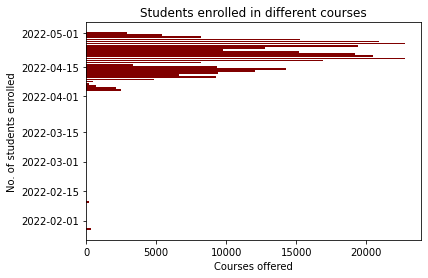

In [79]:
import numpy as np
import matplotlib.pyplot as plt
 
  
x = list(d.keys())
x.sort()
y = [total_len(d[key]) for key in x]
  
 
# creating the bar plot
plt.barh(x, y, color ='maroon')
 
plt.xlabel("Courses offered")
plt.ylabel("No. of students enrolled")
plt.title("Students enrolled in different courses")
plt.show()